# Consumer and product Analytics on Global Super Store Data.

In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Adjust display settings to show all columns
pd.set_option('display.max_columns', None)


## Analysis Questions
1.   What is the overall trend of sales over the years 2011-2014?
2.   How do sales vary across different regions/markets?
3. What are the most common shipping modes used by customers?
4. Is there any correlation between the quantity of items ordered and the profit made?
5. Which product categories/sub-categories contribute the most to sales?
6. Are there any seasonal trends in sales throughout the year?
7. What is the average discount offered on orders?
8. How does the shipping cost vary with different order priorities?
9. Are there any outliers in the dataset that need further investigation?
10. Which cities have the highest and lowest sales?
11. How does the average profit margin vary across different product categories?
12. Are there any noticeable trends in customer segments regarding order size or frequency?
13. What is the distribution of order priorities, and does it impact sales or profit?
14. How does the discount offered affect the quantity of items ordered?
15. Are there any significant differences in sales and profit across different states?
16. Which products have the highest and lowest profit margins?

## Data Collection

In [2]:
# Loading the dataset from GitHub with specified encoding
url = 'https://raw.githubusercontent.com/bidhan666/global_superstore/main/superstore.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

In [3]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## Expore the Data

In [4]:
# Check the dimensions of the dataset
df.shape

(51290, 24)

In [5]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
#summary statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## Data Cleaning

In [7]:
#checking for the missing value
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

As we can see our 'Postal Code' column has alot of null values so dropping that column won't create any problem in our analysis.

In [8]:
# Drop the 'Postal Code' column
df.drop(columns=['Postal Code'], inplace=True)

In [9]:
#lets check for that dimension of the DataFrame after dropping the column
df.shape

(51290, 23)

### Checking duplicate values

In [10]:
#we can use below code so see duplicated data for the given column
#duplicates = df.duplicated(subset=['Product ID'])
#print(duplicates)

In [11]:
#lets check if we have any duplicate value
if df.duplicated().any():
    print("Duplicate values found")
else:
    print("No duplicate values")

No duplicate values


As we can see our data don't have any duplicate values

As we can see in the dataframe info data type of "Order Date" and "Ship Date" are string but actually it should be datetime format. Lets change it.

In [12]:
# Convert the 'Order Date' column to datetime format with modified delimiter
df['Order Date'] = pd.to_datetime(df['Order Date'].astype(str).str.replace('/', '-'), dayfirst=True)

# Convert the 'Ship Date' column to datetime format with modified delimiter
df['Ship Date'] = pd.to_datetime(df['Ship Date'].astype(str).str.replace('/', '-'), dayfirst=True)

Why I did that in above code section?

It is because as we know its in string format with different delimiter i.e. some are '-' and others are '/'. So what i did is I changed all the delimiter with '-' then all of them are in a same format.

In [13]:
#lets check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

Now lets check for any outliers in our dataframe. Outliers are data points that significantly deviate from the rest of the dataset. They can occur due to various reasons such as errors in data collection, measurement variability, or genuinely rare occurrences. Outliers can distort statistical analyses and machine learning models, leading to misleading conclusions or reduced model performance. Therefore, it's essential to identify and handle outliers appropriately.

In [14]:
# Summary statistics
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.375915
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804


1. **Sales:**

  The average sales amount is approximately 246.49, with a standard deviation of 487.57, indicating significant variability in sales.The minimum sales amount is 0.44, and the maximum is 22,638.48. 25% of the sales fall below 30.76, and 75% fall below 251.05.

2. **Quantity:**

  The average quantity of items per order is approximately 3.48. The minimum quantity is 1, and the maximum is 14.50% of orders have a quantity of 3 or fewer items.

3. **Discount:**

  On average, a discount of around 14.29% is applied to orders. Discounts range from 0% to 85%, with most falling below 20%.

4. **Profit:**
  
  The average profit per order is 28.61, with a wide standard deviation of 174.34. There are negative profits as low as -6,599.98, indicating losses on some orders. 75% of orders have a profit of 36.81 or less.

5. **Shipping Cost:**

  The average shipping cost is 26.38, with a standard deviation of 57.30, suggesting variability in shipping charges. Shipping costs range from $0  to 933.57, with most orders having shipping costs below 24.45.

To analyze outliers, we can use techniques such as box plots, histograms, or scatter plots to visualize the distribution of these variables and identify any extreme values. Outliers could indicate unusually high or low values that may need further investigation.

### Histograms
Histograms are useful for visualizing the distribution of a single numerical variable.

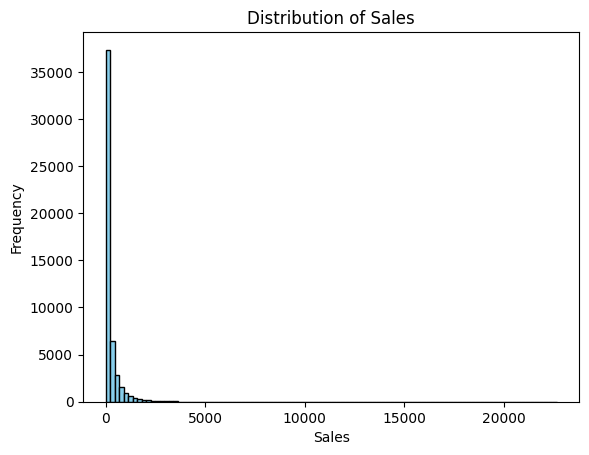

In [15]:
#plotting using histograms
#applying outliers in our numerical data

#Sales
plt.hist(df['Sales'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()


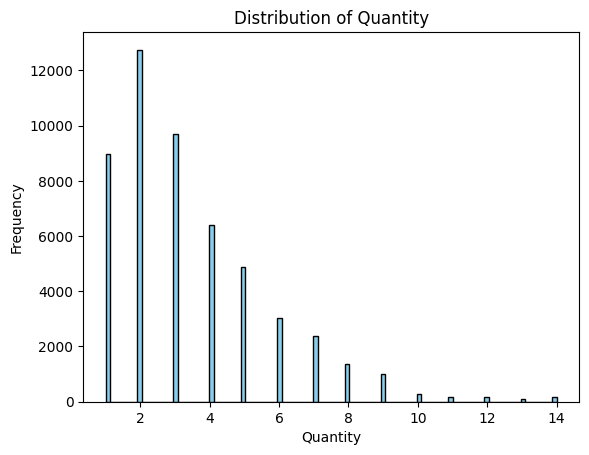

In [16]:
#Quantity
plt.hist(df['Quantity'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

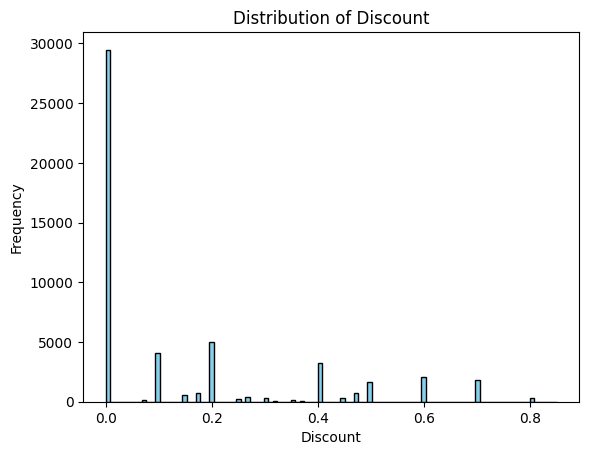

In [17]:
#Discount
plt.hist(df['Discount'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Distribution of Discount')
plt.show()

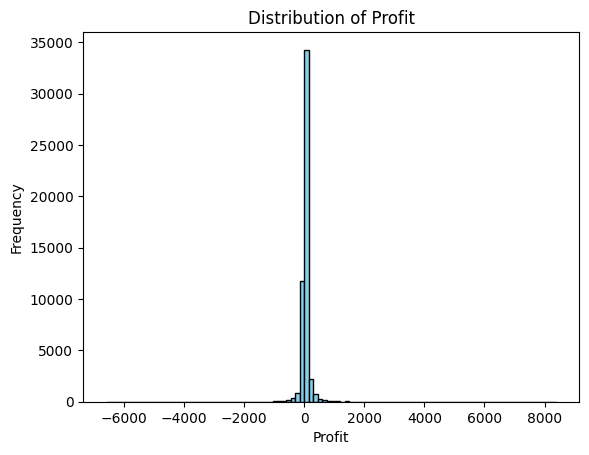

In [18]:
#Profit
plt.hist(df['Profit'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')
plt.show()

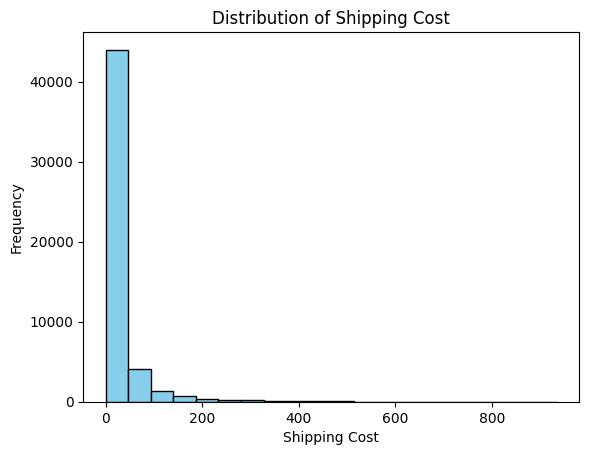

In [19]:
#Shipping Cost
plt.hist(df['Shipping Cost'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Shipping Cost')
plt.show()

### Box Plots
Box plots are useful for visualizing the distribution, central tendency, and variability of a numerical variable, as well as identifying outliers.

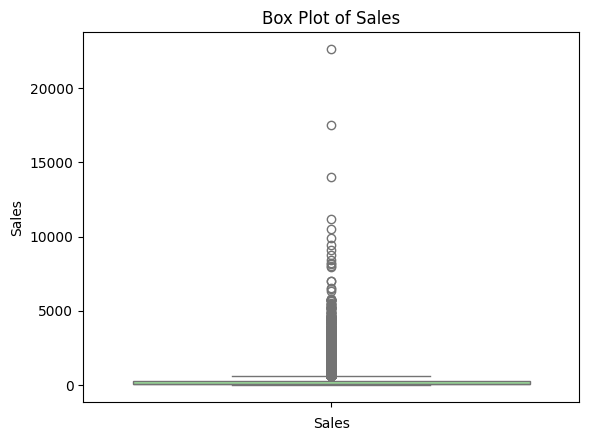

In [20]:
# Plot a box plot

#Sales
sns.boxplot(df['Sales'], color='lightgreen')
plt.xlabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

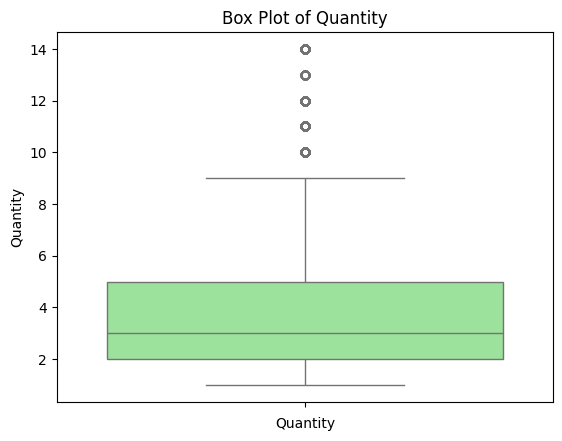

In [21]:
#Quantity
sns.boxplot(df['Quantity'], color='lightgreen')
plt.xlabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()

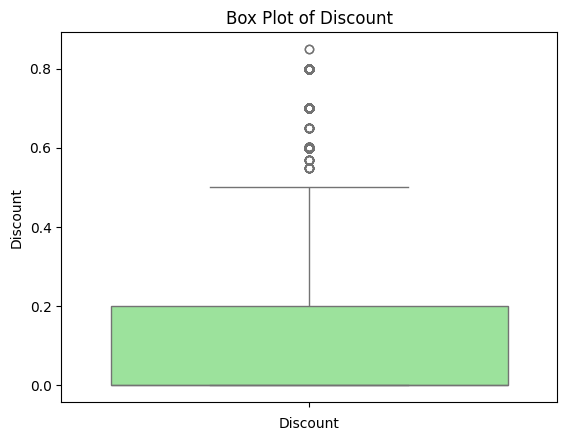

In [22]:
#Discount
sns.boxplot(df['Discount'], color='lightgreen')
plt.xlabel('Discount')
plt.title('Box Plot of Discount')
plt.show()

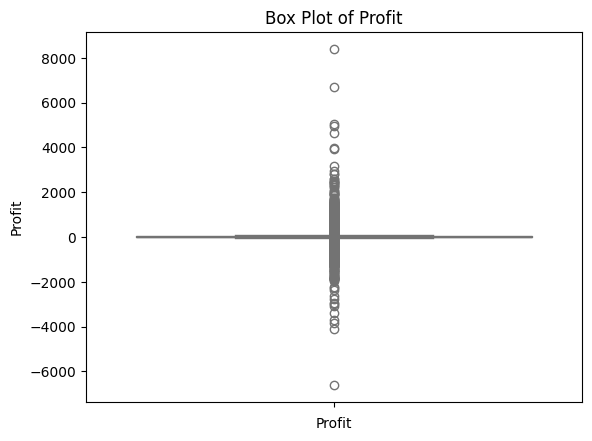

In [23]:
#Profit
sns.boxplot(df['Profit'], color='lightgreen')
plt.xlabel('Profit')
plt.title('Box Plot of Profit')
plt.show()

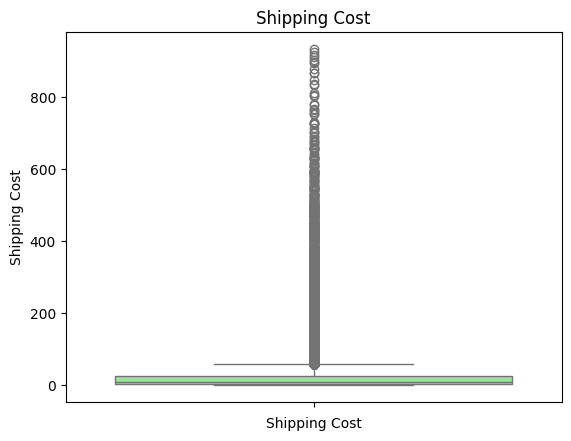

In [24]:
#Shipping Cost
sns.boxplot(df['Shipping Cost'], color='lightgreen')
plt.xlabel('Shipping Cost')
plt.title('Shipping Cost')
plt.show()

### Scatter Plots
Scatter plots are useful for visualizing the relationship between two numerical variables

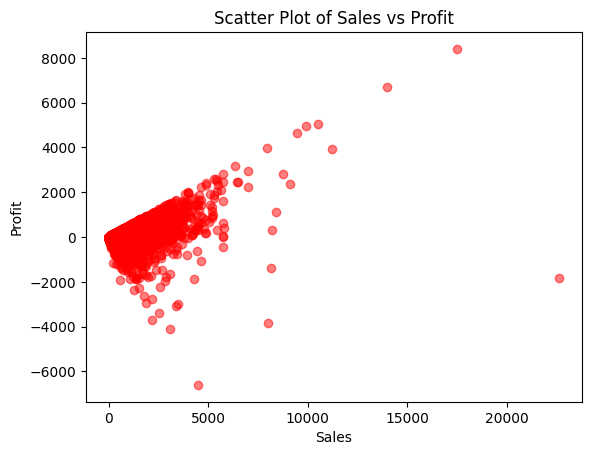

In [25]:
# Plot a scatter plot

#Sales and Profit
plt.scatter(df['Sales'], df['Profit'], color='red', alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Scatter Plot of Sales vs Profit')
plt.show()


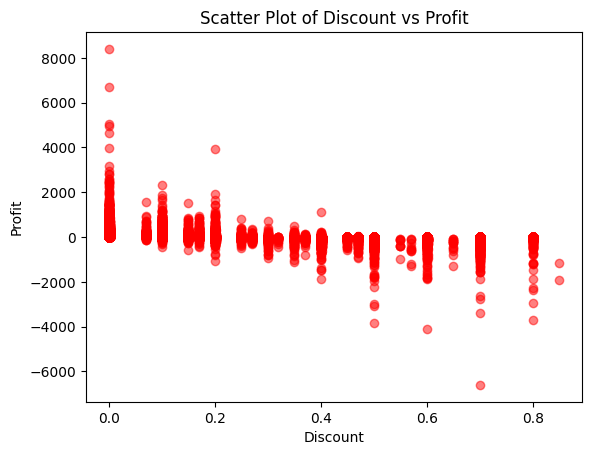

In [26]:
# Plot a scatter plot

#Discount and Profit
plt.scatter(df['Discount'], df['Profit'], color='red', alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Scatter Plot of Discount vs Profit')
plt.show()

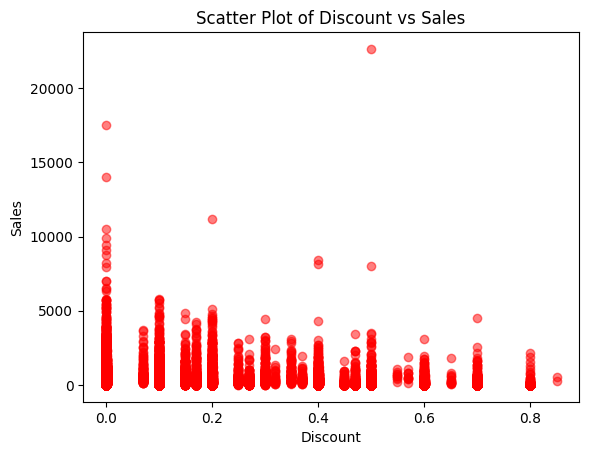

In [27]:
# Plot a scatter plot

#Discount and Sales
plt.scatter(df['Discount'], df['Sales'], color='red', alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.title('Scatter Plot of Discount vs Sales')
plt.show()

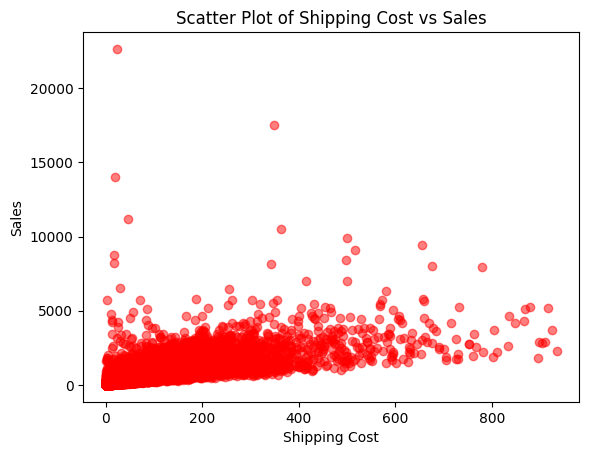

In [28]:
# Plot a scatter plot

#Shipping Cost and Sales
plt.scatter(df['Shipping Cost'], df['Sales'], color='red', alpha=0.5)
plt.xlabel('Shipping Cost')
plt.ylabel('Sales')
plt.title('Scatter Plot of Shipping Cost vs Sales')
plt.show()

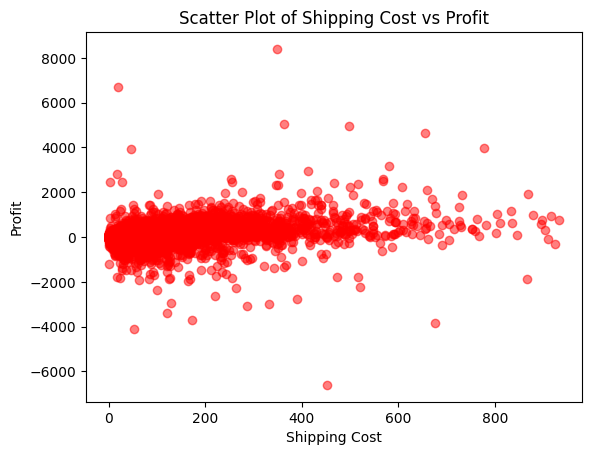

In [29]:
# Plot a scatter plot

#Shipping Cost and Profit
plt.scatter(df['Shipping Cost'], df['Profit'], color='red', alpha=0.5)
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.title('Scatter Plot of Shipping Cost vs Profit')
plt.show()

## Feature Engineering

Feature engineering involves creating new features or transforming existing ones to improve the performance of machine learning models or gain better insights from the data



### Date Features

Extracting additional information from date columns such as day of the week, month, quarter, or year can help capture seasonal patterns in sales.

In [30]:
#Extracting addition information from Order Date column

#Year
df['Order Year'] = pd.to_datetime(df['Order Date']).dt.year

#Month
df['Order Month'] = pd.to_datetime(df['Order Date']).dt.month

#Day
df['Order Day'] = pd.to_datetime(df['Order Date']).dt.day

In [31]:
#checking unique years present in our df
sorted(df['Order Year'].unique())

[2011, 2012, 2013, 2014]

### Aggregated Features

Calculate aggregate statistics (e.g., mean, sum, max, min) for numerical variables based on different groupings such as customer ID, product category, or region.

In [32]:
#Calculating sum of customer sales
customer_sales = df.groupby('Customer ID')['Sales'].sum()

In [35]:
#printing top 10 customers with highest sales
top_10_customers = customer_sales.nlargest(10)
top_10_customers

Customer ID
TA-21385    35668.12080
GT-14710    34471.89028
TC-20980    34218.26900
SM-20320    31125.29496
BW-11110    30613.61650
HL-15040    29664.23058
SE-20110    29532.62502
PS-19045    29252.31940
RB-19360    29197.63460
ZC-21910    28472.81926
Name: Sales, dtype: float64

### Interaction Features

Create new features by performing arithmetic operations or interactions between existing features.

In [44]:
# Example:
df['Repeat Purchase Rate'] = df.groupby('Customer ID')['Order ID'].nunique() / df.groupby('Customer ID').size()

In [45]:
df['Repeat Purchase Rate']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
51285   NaN
51286   NaN
51287   NaN
51288   NaN
51289   NaN
Name: Repeat Purchase Rate, Length: 51290, dtype: float64

Calculating the repeat purchase rate can provide valuable insights into customer behavior and loyalty. By grouping the data by customer and calculating the ratio of unique orders to total orders, we can determine the percentage of customers who have made repeat purchases. This information is useful for identifying loyal customers, understanding customer retention, and making data-driven decisions to improve customer satisfaction and increase sales. It helps businesses evaluate customer engagement and tailor marketing strategies accordingly. But as we can see we don't have any repeate purchase.

# Exploratory Data Analysis (EDA)

#### **What is the overall trend of sales over the years 2011-2014?**

In [46]:
# Filter data for the years 2011-2014
df_2011_2014 = df[df['Order Year'].isin(range(2011, 2015))]

In [47]:
# Group by year and calculate total sales for each year
sales_by_year = df_2011_2014.groupby(df_2011_2014['Order Year'])['Sales'].sum()

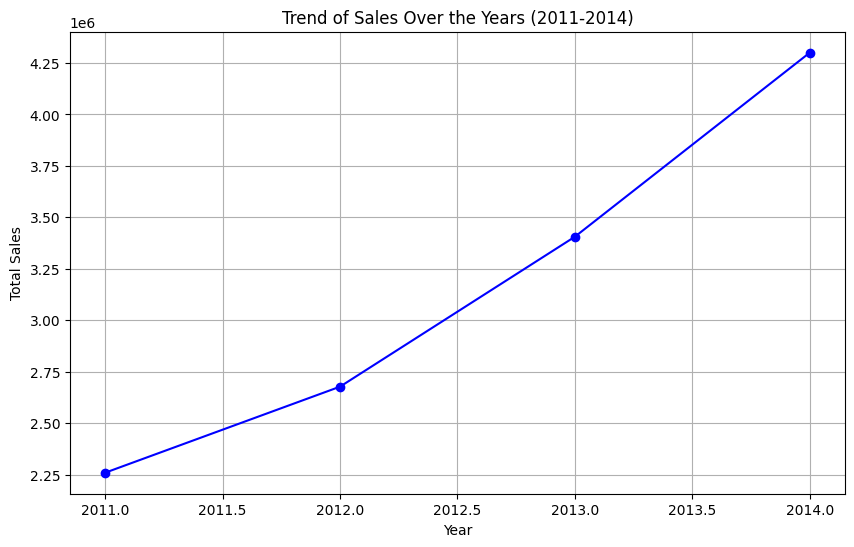

In [48]:
# Plot the trend of total sales over the years
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o', color='b')
plt.title('Trend of Sales Over the Years (2011-2014)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Sales appear to have increased steadily from 2011 to 2014.

#### **How do sales vary across different regions/markets?**

In [49]:
# Group the data by region or market and calculate total sales for each region or market
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

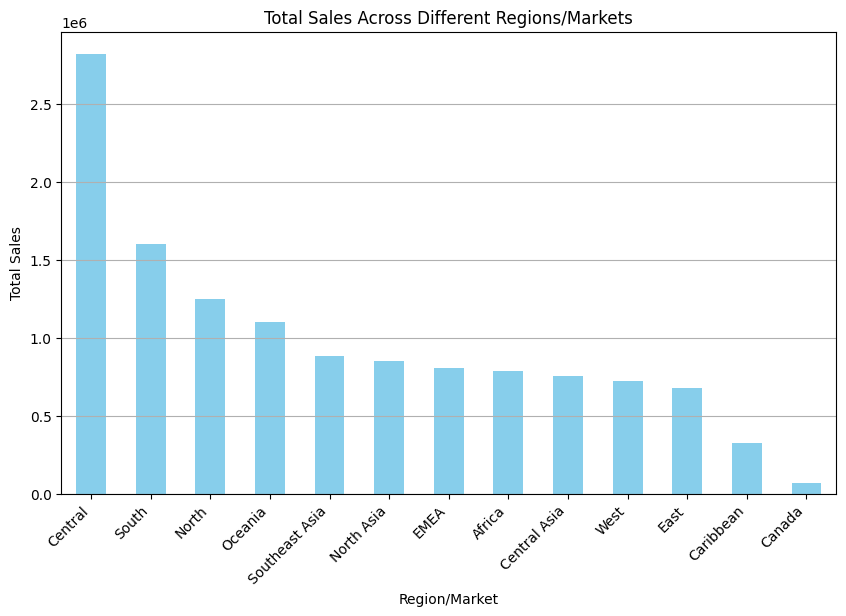

In [50]:
# Plot the sales across different regions/markets
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales Across Different Regions/Markets')
plt.xlabel('Region/Market')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Central region has a highest sales whereas canada has lowest.

#### **What are the most common shipping modes used by customers?**

In [53]:
#first lets check how many modes of shipping we have in our dataset
df['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [51]:
# Group the data by shipping mode and count the number of occurrences of each mode
shipping_modes_counts = df['Ship Mode'].value_counts()

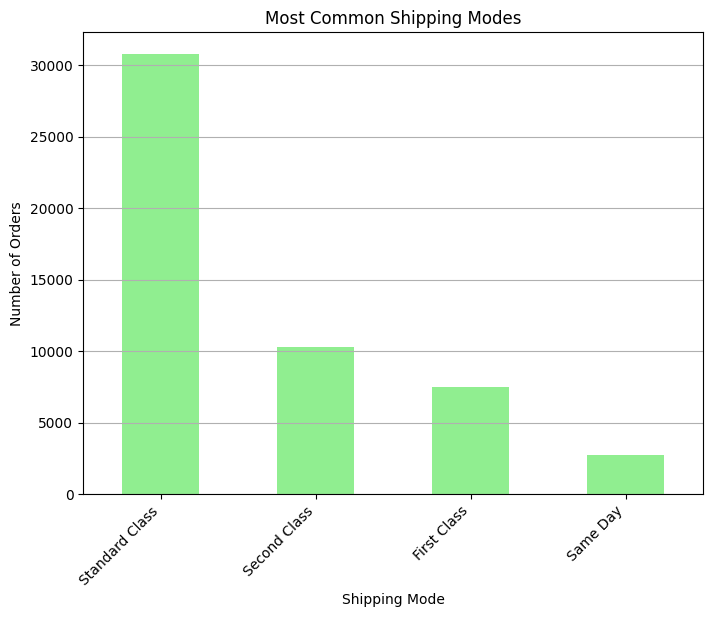

In [52]:
# Plot the most common shipping modes
plt.figure(figsize=(8, 6))
shipping_modes_counts.plot(kind='bar', color='lightgreen')
plt.title('Most Common Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Mostly people have prefered standard class shipping as it is cost efficency

#### **Is there any correlation between the quantity of items ordered and the profit made?**


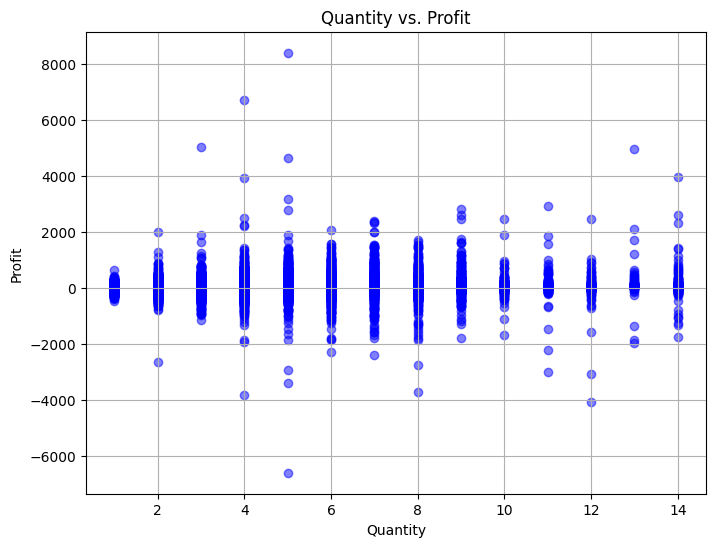

Correlation coefficient between quantity and profit: 0.10436502716960343


In [56]:
# Calculate the correlation coefficient between quantity and profit
correlation = df['Quantity'].corr(df['Profit'])

# Plot a scatter plot of quantity vs. profit
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Profit'], color='blue', alpha=0.5)
plt.title('Quantity vs. Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

print("Correlation coefficient between quantity and profit:", correlation)

The correlation coefficient between quantity and profit is approximately 0.10436502716960343.

Since the correlation coefficient is close to 0, it suggests a weak positive correlation between the quantity of items ordered and the profit made. This means that there is a slight tendency for profit to increase as the quantity of items ordered increases, but the correlation is not very strong. Other factors may have a greater influence on profit.

It's important to note that correlation does not imply causation, and further analysis may be needed to understand the relationship between quantity and profit more comprehensively.

#### **Which product categories/sub-categories contribute the most to sales?**

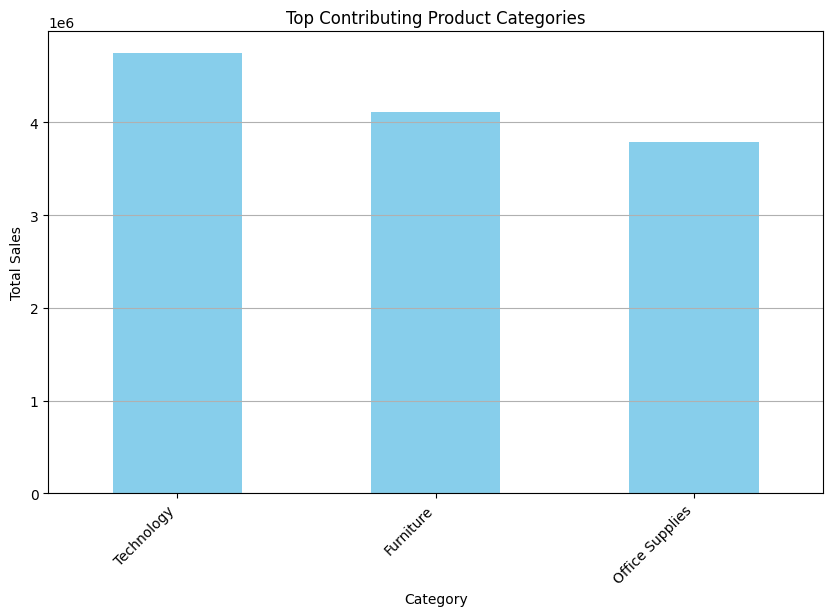

In [57]:
# Group the data by category and calculate total sales
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plot the top contributing product categories
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Top Contributing Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

As we can see Technology category contributed most to the sales. Let's check its sub-categories.

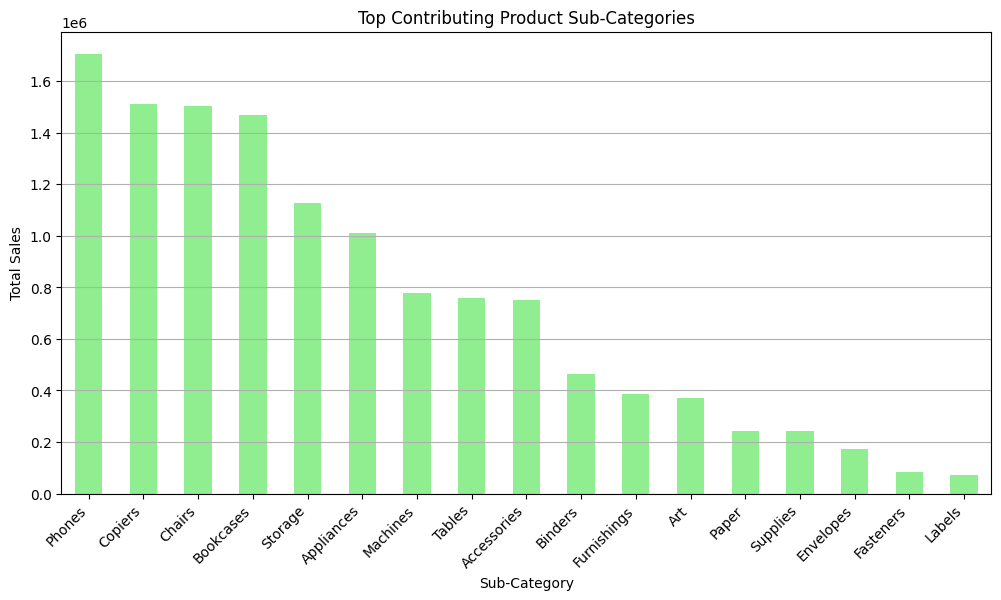

In [58]:
# Group the data by sub-category and calculate total sales
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Plot the top contributing product sub-categories
plt.figure(figsize=(12, 6))
sales_by_subcategory.plot(kind='bar', color='lightgreen')
plt.title('Top Contributing Product Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In sub-category phones have contributed alot whereas labels contributed least.

#### **Are there any seasonal trends in sales throughout the year?**

In [59]:
# Group the data by month and calculate total sales for each month
monthly_sales = df.groupby('Order Month')['Sales'].sum()

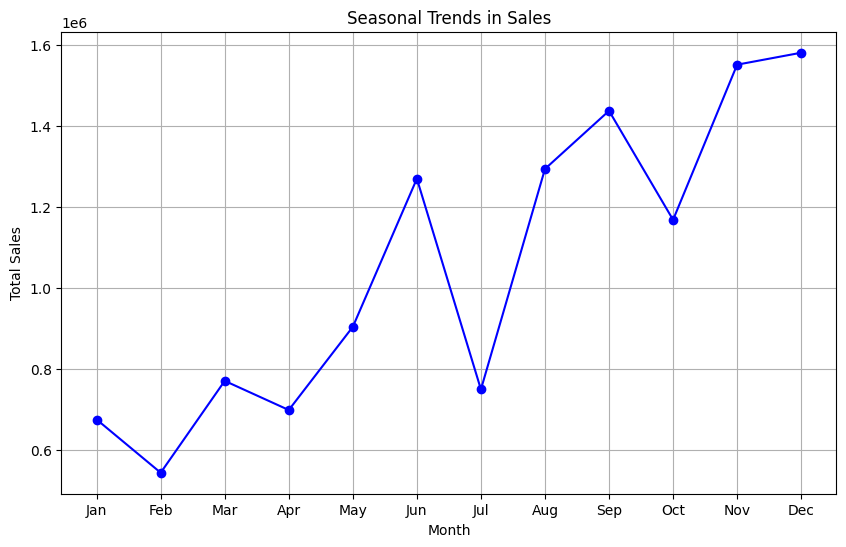

In [60]:
# Plot the monthly sales data
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Seasonal Trends in Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The line graph shows a positive trend in sales over time. It indicates that sales have been consistently increasing throughout the year, with a slight decline observed during the summer months. Why that happened needs further analysis.


#### **What is the average discount offered on orders?**

In [61]:
# Calculate the average discount offered on orders
average_discount = df['Discount'].mean()

print("Average discount offered on orders:", average_discount)

Average discount offered on orders: 0.14290754533047378


#### **How does the shipping cost vary with different order priorities?**

In [63]:
# Group the data by order priority and calculate the average shipping cost for each priority level
average_shipping_cost = df.groupby('Order Priority')['Shipping Cost'].mean()

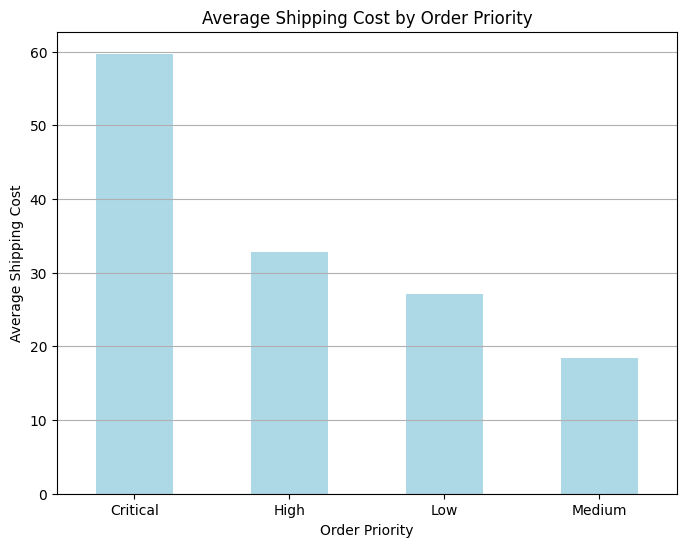

Average shipping cost by order priority:
Order Priority
Critical    59.721333
High        32.871887
Low         27.076448
Medium      18.442428
Name: Shipping Cost, dtype: float64


In [64]:
# Plot the average shipping cost by order priority
plt.figure(figsize=(8, 6))
average_shipping_cost.plot(kind='bar', color='lightblue')
plt.title('Average Shipping Cost by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Shipping Cost')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

print("Average shipping cost by order priority:")
print(average_shipping_cost)

#### **Which cities have the highest and lowest sales?**

In [65]:
# Group the data by city and calculate total sales for each city
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

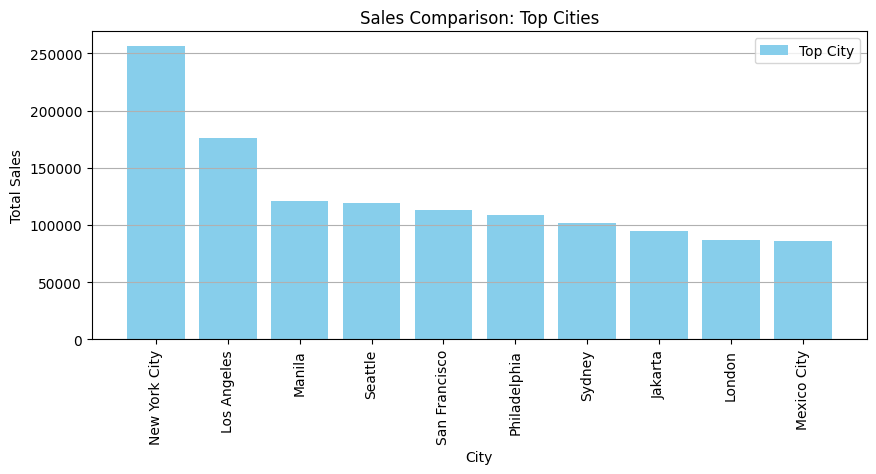

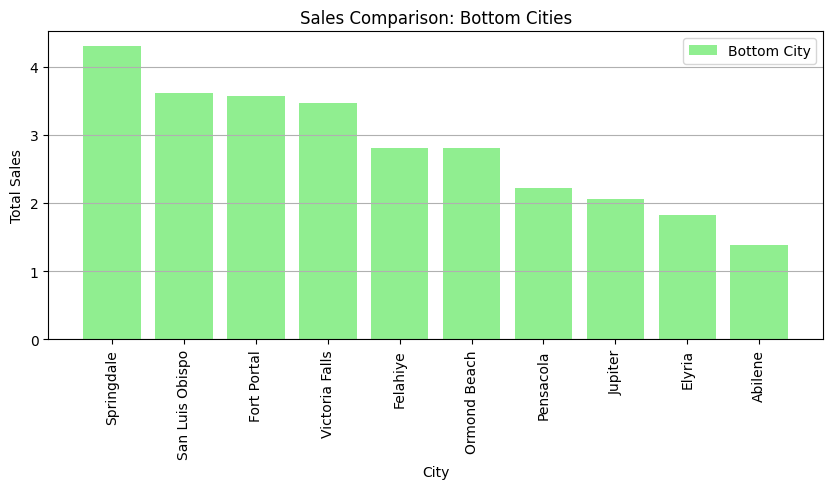

In [66]:
# Extract top and bottom cities
top_city = sales_by_city.head(10)
bottom_city = sales_by_city.tail(10)

# Plot the sales for the top and bottom cities
plt.figure(figsize=(10, 4))
plt.bar(top_city.index, top_city, color='skyblue', label='Top City')
plt.title('Sales Comparison: Top Cities')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.show()


# Plot the sales for the bottom and bottom cities
plt.figure(figsize=(10, 4))
plt.bar(bottom_city.index, bottom_city, color='lightgreen', label='Bottom City')
plt.title('Sales Comparison: Bottom Cities')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.show()




#### **How does the average profit margin vary across different product categories?**

In [67]:
# Calculate the profit margin for each row
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by category and calculate the average profit margin for each category
average_profit_margin_by_category = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending = False)

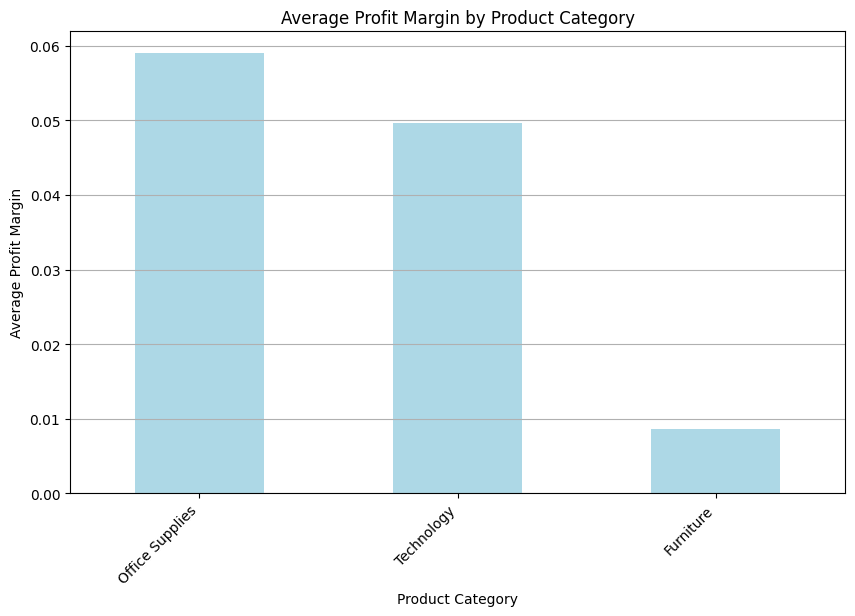

In [68]:
# Plot the average profit margin by product category
plt.figure(figsize=(10, 6))
average_profit_margin_by_category.plot(kind='bar', color='lightblue')
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

As we can see above profit is more with technology but here we can clearly see that average profit in the sale is more in office supplies.

#### **Are there any noticeable trends in customer segments regarding order size or frequency?**

In [69]:
# Calculate order size (quantity of items ordered) for each order
order_size = df.groupby('Order ID')['Quantity'].sum()

# Calculate order frequency (number of orders placed) for each customer
order_frequency = df.groupby('Customer ID')['Order ID'].nunique()

# Merge order size and order frequency with the original DataFrame
df = df.merge(order_size.rename('Order Size'), on='Order ID')
df = df.merge(order_frequency.rename('Order Frequency'), on='Customer ID')

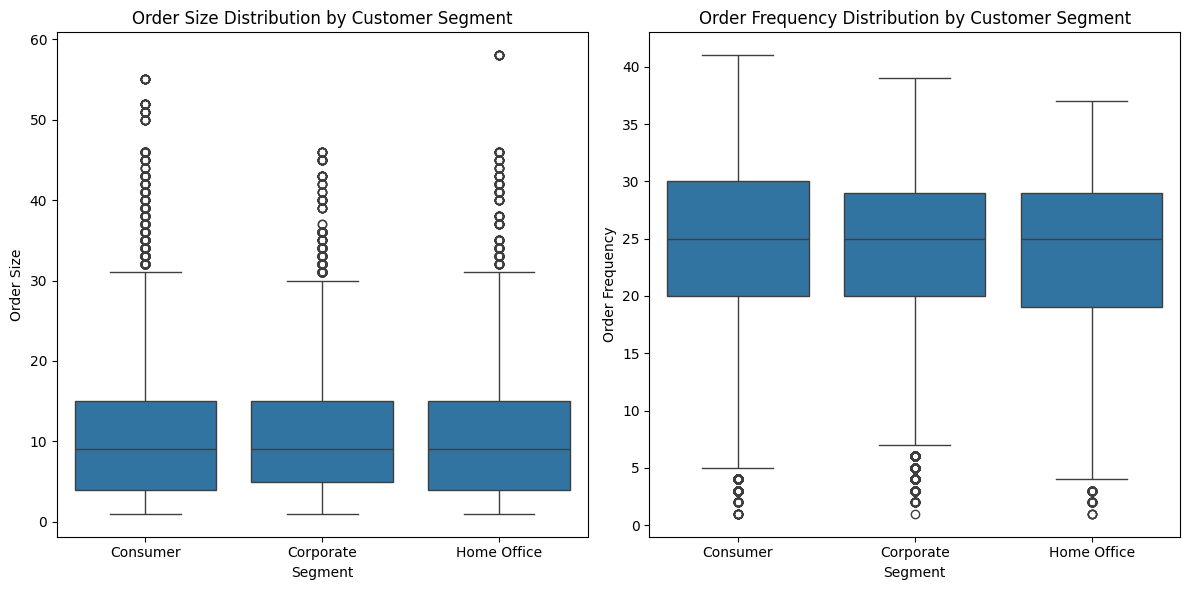

In [70]:
# Plot the distribution of order size and order frequency across different customer segments
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Segment', y='Order Size', data=df)
plt.title('Order Size Distribution by Customer Segment')

plt.subplot(1, 2, 2)
sns.boxplot(x='Segment', y='Order Frequency', data=df)
plt.title('Order Frequency Distribution by Customer Segment')

plt.tight_layout()
plt.show()

Both order size and order frequency distributions are fairly consistent across the Consumer, Corporate, and Home Office segments, suggesting similar purchasing behavior in terms of order size and frequency.

Each segment has significant outliers, especially on the higher end of the order size spectrum and lower end of the order frequency spectrum. This indicates occasional very large orders and sporadic low-frequency ordering.
These trends suggest that while most customers across different segments behave similarly, there are some customers with notably different purchasing behaviors, especially in terms of making very large orders or ordering very infrequently.

#### **What is the distribution of order priorities, and does it impact sales or profit?**

In [73]:
#lets findout whats inside the order priorities
df['Order Priority'].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

In [81]:
#grouping the order priority and finding the total sales
order_priority_sales = df.groupby('Order Priority')['Sales'].sum()
order_priority_sales

Order Priority
Critical    9.862355e+05
High        3.807548e+06
Low         5.678259e+05
Medium      7.280892e+06
Name: Sales, dtype: float64

In [82]:
#grouping the order priority and finding the total profit
order_priority_profit = df.groupby('Order Priority')['Profit'].sum()
order_priority_profit

Order Priority
Critical    124224.16428
High        420373.51340
Low          58655.85098
Medium      864203.76262
Name: Profit, dtype: float64

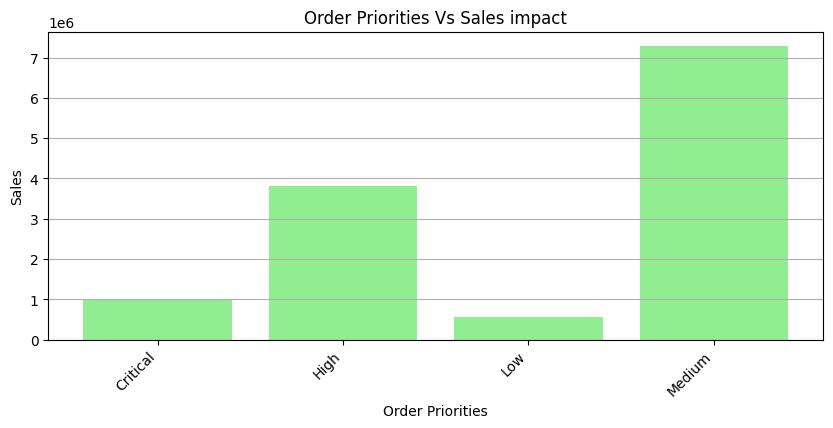

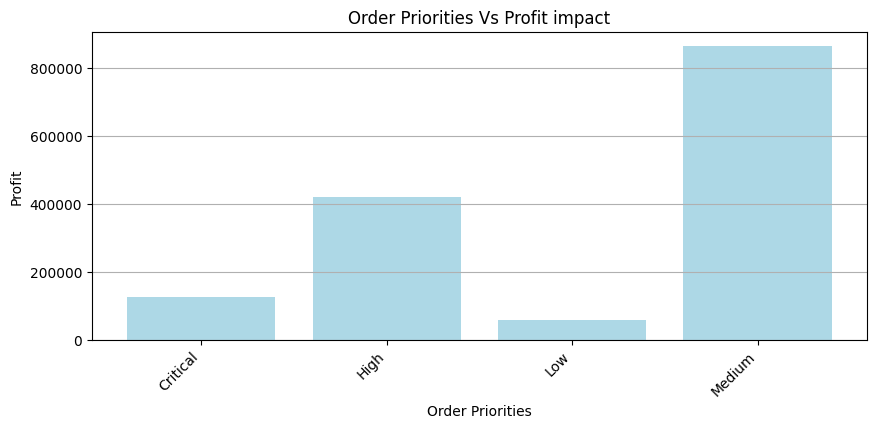

In [86]:
#plotting order priority vs sales impact
plt.figure(figsize=(10, 4))
plt.bar(order_priority_sales.index, order_priority_sales, color='lightgreen')
plt.title('Order Priorities Vs Sales impact')
plt.xlabel('Order Priorities')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


#plotting order priority vs profit impact
plt.figure(figsize=(10, 4))
plt.bar(order_priority_profit.index, order_priority_profit, color='lightblue')
plt.title('Order Priorities Vs Profit impact')
plt.xlabel('Order Priorities')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Medium order priority brings more sales and more profit whereas low priority is just opposite.

#### **How does the discount offered affect the quantity of items ordered?**

In [92]:
#lets check discount offered
discount_quantity = df.groupby('Discount')['Quantity'].mean()
discount_quantity

Discount
0.000    3.404736
0.002    3.594360
0.070    3.553333
0.100    3.789823
0.150    3.735675
0.170    3.700680
0.200    3.732093
0.202    3.292683
0.250    4.171717
0.270    3.744845
0.300    3.720588
0.320    3.888889
0.350    3.713115
0.370    3.324324
0.400    3.654706
0.402    3.278846
0.450    3.660550
0.470    3.902069
0.500    3.804654
0.550    3.600000
0.570    3.916667
0.600    2.722333
0.602    3.391304
0.650    3.882353
0.700    2.759239
0.800    3.933544
0.850    5.000000
Name: Quantity, dtype: float64

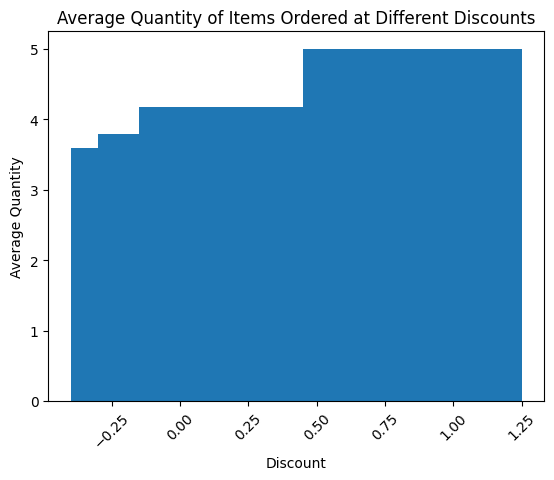

In [95]:
#ploting
discounts = discount_quantity.index
average_quantity = discount_quantity.values

plt.bar(discounts, average_quantity)
plt.xlabel('Discount')
plt.ylabel('Average Quantity')
plt.title('Average Quantity of Items Ordered at Different Discounts')
plt.xticks(rotation=45)
plt.show()

At a discount of 0.000, the average quantity is approximately 3.40 items, while at a discount of 0.850, the average quantity jumps to 5.00 items.

This suggests that offering higher discounts may have a positive impact on the quantity of items ordered, as customers tend to order more items when higher discounts are applied.

#### **Are there any significant differences in sales and profit across different states?**

In [105]:
#finding sales and profit difference across states
sales_profit_difference = df.groupby('State')[['Sales','Profit']].sum()
sales_profit_difference

,Sales,Profit
State,,
'Ajman,209.98800,-332.71200
'Amman,7167.99000,1797.99000
'Asir,1603.50000,310.65000
Abia,1064.12400,-1475.55600
Abruzzi,6723.75000,977.76000
...,...,...
Zinder,362.73000,122.28000
Zulia,4208.93696,-994.14304
Zürich,11707.74000,3393.48000


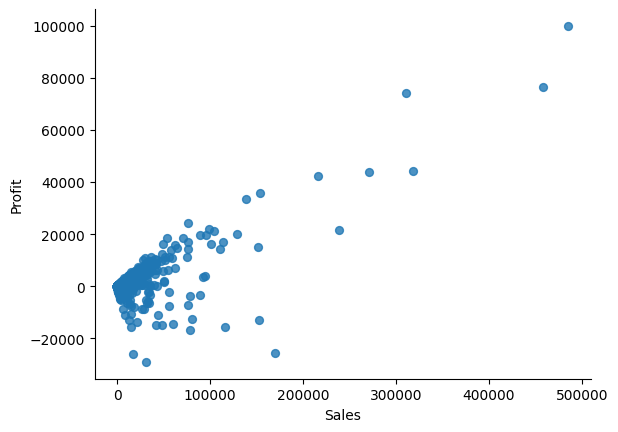

In [115]:
# @title Sales vs Profit
sales_profit_difference.plot(kind='scatter', x='Sales', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [106]:
#lets find top 20
top_20 = sales_profit_difference.nlargest(20, ['Sales','Profit'])
top_20

,Sales,Profit
State,,
England,485170.97100,99907.73100
California,457687.63150,76381.38710
Ile-de-France,317822.54400,44055.92400
New York,310876.27100,74038.54860
New South Wales,270487.10400,43695.98400
Queensland,238312.73400,21608.75400
North Rhine-Westphalia,216451.85100,42347.87100
Texas,170188.04580,-25729.35630
San Salvador,153639.39700,35883.37700


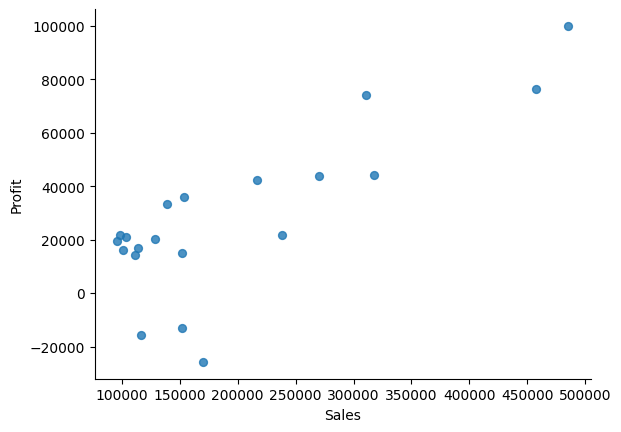

In [112]:
# @title Sales vs Profit
top_20.plot(kind='scatter', x='Sales', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

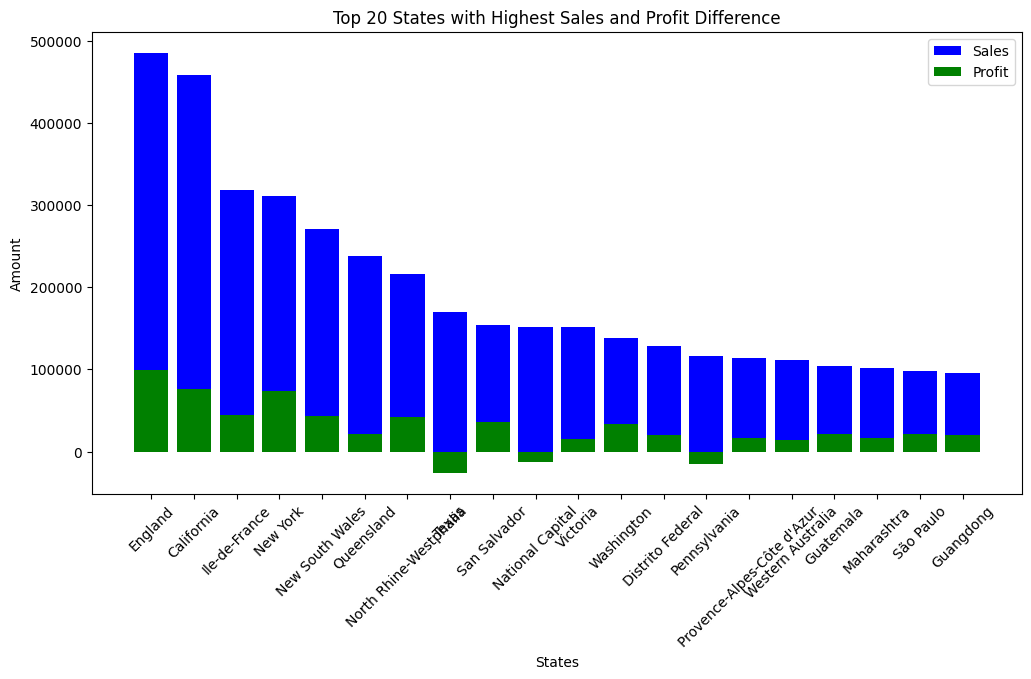

In [110]:
# Plotting the top 20 states
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_20.index, top_20['Sales'], label='Sales', color='blue')
ax.bar(top_20.index, top_20['Profit'], label='Profit', color='green')
ax.set_xlabel('States')
ax.set_ylabel('Amount')
ax.set_title('Top 20 States with Highest Sales and Profit Difference')
ax.legend()
plt.xticks(rotation=45)
plt.show()

#### **Which products have the highest and lowest profit margins?**

In [120]:
# Finding the products with the highest profit margins
highest_profit_margin_products = df.groupby('Product Name')['Profit Margin'].max()
print(highest_profit_margin_products.nlargest(1))

# Finding the products with the lowest profit margins
lowest_profit_margin_products = df.groupby('Product Name')['Profit Margin'].min()
print(lowest_profit_margin_products.nsmallest(1))

Product Name
"While you Were Out" Message Book, One Form per Page    0.5
Name: Profit Margin, dtype: float64
Product Name
Chromcraft Coffee Table, Fully Assembled   -4.733542
Name: Profit Margin, dtype: float64


## **Conclusion**
This analysis emphasizes the importance of evaluating profit margins on a product level. It enables businesses to identify products that are profitable and focus on maximizing profitability in those areas. It highlights the need to investigate and address products with low or negative profit margins to optimize costs and improve overall profitability.

It's important to note that these conclusions are based on the provided data and should be considered within the specific context of the business or industry. Further analysis and considerations may be necessary to make well-informed bold textbusiness decisions.